In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [139]:
dfall = pd.read_csv("data/NYC_vehicle_crash.csv", low_memory = False)
dfall.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,7/26/18,12:10,NaN,NaN,40.704494,-73.81743,POINT (-73.81743 40.704494),VAN WYCK EXPWY,NaN,NaN,...,Unspecified,Unspecified,NaN,NaN,3948740,Sedan,Sedan,Taxi,NaN,NaN
1,7/12/18,17:40,BRONX,10470,40.903890,-73.85139,POINT (-73.85139 40.90389),EAST 241 STREET,RICHARDSON AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3943762,Sedan,Sedan,NaN,NaN,NaN
2,7/11/18,16:30,MANHATTAN,10022,40.760464,-73.97372,POINT (-73.97372 40.760464),NaN,NaN,532 MADISON AVENUE,...,Passing or Lane Usage Improper,NaN,NaN,NaN,3939841,Van,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,7/6/18,19:40,BRONX,10469,40.872826,-73.85210,POINT (-73.8521 40.872826),NaN,NaN,1215 EAST GUN HILL ROAD,...,Unsafe Speed,Unspecified,NaN,NaN,3936658,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
4,7/26/18,19:13,BRONX,10469,40.866510,-73.85772,POINT (-73.85772 40.86651),NaN,NaN,2789 HONE AVENUE,...,Other Vehicular,NaN,NaN,NaN,3949531,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [148]:
# Create different new columns for hour, each month and year-month from given Date and time columns 

hours = dfall['CRASH TIME'].str.split(":", expand = True)

dfall['HOUR'] = hours[0]

# make 01 02, ... in hour to sort 
dfall['HOUR'] = dfall['HOUR'].apply(lambda x: x.zfill(2))

months = dfall['CRASH DATE'].str.split("/", expand = True)
dfall['MONTH'] = months[0]

# extract months to compare and plot monthly car crash 
dfall['YEAR-MONTH'] = pd.to_datetime(dfall['CRASH DATE']).dt.to_period('M')


# Reverse geocoding function: <br>
Write a function to find zipcode from given latitude/longitude

In [141]:
# To use as a single arguement of form (lat, long) in funcion, create and format a column in the form of lat, long

dfall['lattitude_str'] = dfall['LATITUDE'].astype(str)

dfall['longitude_str'] = dfall['LONGITUDE'].astype(str)

dfall['COORD_POINT'] = dfall['lattitude_str'].str.cat(dfall['longitude_str'], sep = ',')

In [141]:
from geopy.geocoders import Nominatim
geopy.geocoders.options.default_user_agent = 'my_app/1'
geopy.geocoders.options.default_timeout = 7
geolocator = Nominatim()
print(geolocator.headers)
{'User-Agent': 'my_app/1'}
print(geolocator.timeout)

In [12]:
# Find  borough/zip code from  lattitude/longtide

import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import plotly_express as px
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
geopy.geocoders.options.default_timeout = 7


def find_zipcode_from_lati_longitude(coordinates):
    
    '''
    Given a lattitude and longtitude coordinates (from Pandas Dataframe, df,)
    return zipcode of that coordinates
    
    Parameter
    ----------
    coordinates: point with x,y in the form: lattitude, longitude 
    
    Returns:
    --------
    zipcode: (int) zipcode of coordinates 
    '''
    if coordinates == 'nan,nan':
        zipcode = '00000'
    else: 
        locator = Nominatim(user_agent="myGeocoder")
        location = locator.reverse(coordinates)
        location.raw
        full_address = str(location.address)
        lst_of_address = full_address.split(',')
        zipcode = lst_of_address[-2]

    return zipcode 




def find_borough_from_lati_longitude(coordinates):

    '''
    Given a lattitude and longtitude coordinates (from Pandas Dataframe, df,)
    return city-borough of that coordinates
    
    Parameter
    ----------
    coordinates: point with x,y in the form: lattitude, longitude 
    
    Returns:
    --------
    borough: (str) borough(eg. Queens, Brooklyn, etc.) of coordinates 
    '''
    if coordinates == 'nan,nan':
        borough = 'Not availbe'
    else: 
        locator = Nominatim(user_agent="myGeocoder")
        location = locator.reverse(coordinates)
        location.raw
        full_address = str(location.address)
        lst_of_address = full_address.split(',')
        borough = lst_of_address[-5]

    return borough 

# df1['zip_code'] = df1['coord_point'].apply(lambda x:find_zipcode_from_lati_longitude(x))
# df1['NYC_borough'] = df1['coord_point'].apply(lambda x:find_borough_from_lati_longitude(x))


# Heat map with Folium 

In [ ]:

import numpy as np
import pandas as pd
import datetime
import folium
from folium.plugins import HeatMap

mydf = pd.read_csv("nyc_crash_fol.csv")




#Create a map object
nyc_map = folium.Map(location=[40.751456, -73.979578 ],
                     zoom_start=11,
                     tiles="Cartodbpositron")

#Heat_map
heat_map = folium.FeatureGroup(name = 'heat_map')
max_amount = float(60)
heat_map.add_child( HeatMap (list(zip(mydf['LATITUDE'].values, mydf['LONGITUDE'].values)),
                             min_opacity=0.2,
                             max_val=max_amount,
                             radius=3, blur=2, max_zoom=1))
nyc_map.add_child(heat_map)


def plotter(mydf, my_map, color):
    '''
    Plots geo-locations coordinates(lattitude, longitude) from a DataFrame

    ARGS:
        df -> dataframe containing relevant coordinates
        my_map -> the Feature group the points will be added to
        color -> color of dots
        
    Return:
        none
    '''
    
    for index, row in mydf.iterrows():
        folium.CircleMarker(location=(row['LATITUDE'], row['LONGITUDE']),
                                    radius=4,
                                    color=color,
                                    popup=str('Number of persons killed: ' + str(row['NUMBER OF PERSONS KILLED']) \
                                              + '\nDate: ' + row['CRASH DATE'] \
                                              + '\nTime: '+ row['CRASH TIME'] \
                                              + '\nContrib. Factor: ' + str(row['CONTRIBUTING FACTOR VEHICLE 1'])
                                             ),
                                    fill=True).add_to(my_map)

       
        
#Add a layer for all accidents involving cyclists killed
cyclist_map = folium.FeatureGroup(name = 'cyclist')
cycle_df = mydf[mydf['NUMBER OF CYCLIST KILLED'] > 0]
plotter(cycle_df, cyclist_map, "#e32522") #red dots
nyc_map.add_child(cyclist_map)

#Add a layer for crashes involving pedestrians killed
pedestrian_map = folium.FeatureGroup(name = 'pedestrian_map')
pedestrian_df = mydf[mydf['NUMBER OF PEDESTRIANS KILLED'] > 0]
plotter(pedestrian_df, pedestrian_map, "#00a550") #green dots
nyc_map.add_child(pedestrian_map)

#Add a layer for crashes involving motorists killed
motorist_killed = folium.FeatureGroup(name = 'motorist_killed')
motorist_df = mydf[mydf['NUMBER OF MOTORIST KILLED'] > 0]
plotter(motorist_df, motorist_killed, "#03fc35") #blue dots
nyc_map.add_child(motorist_killed)

#Add a layer for all accidents caused by road rage   
road_rage = folium.FeatureGroup(name = 'road_rage')
road_rage_df = mydf[mydf['CONTRIBUTING FACTOR VEHICLE 1'] == 'Aggressive Driving/Road Rage']
plotter(road_rage_df, road_rage, '#e38f22') #orange dots
nyc_map.add_child(road_rage)

#Add a layer for all accidents involving a driver distraction  
distract = folium.FeatureGroup(name = 'distract')
distract_df = mydf[mydf['CONTRIBUTING FACTOR VEHICLE 1'] == 'Driver Inattention/Distraction']
plotter(distract_df, distract, '#e38f22') #orange dots
nyc_map.add_child(distract)


#Add a layer for all accidents due to following too closely   
too_close = folium.FeatureGroup(name = 'too_close')
too_close_df = mydf[mydf['CONTRIBUTING FACTOR VEHICLE 1'] == 'Following Too Closely']
plotter(too_close_df, too_close, '#1e2100') #yello dots
nyc_map.add_child(too_close)

#Add toggle buttons for layers
folium.LayerControl().add_to(nyc_map)     #Add layer control to toggle on/off
nyc_map.save('Folium_heat_map.html')


# Data exploration / Cleaning

In [28]:
mydf = pd.read_csv("data/nyc_crash_fol.csv")

In [96]:
mydf.sample(5)

,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,HOUR,MONTH,YEAR-MONTH
38051,4254288,12/6/19,12:00,QUEENS,11415,40.713490,-73.82906,POINT (-73.82906 40.71349),NaN,NaN,...,0,0,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,12.0,12,2019-12
123428,4160669,6/28/19,9:40,MANHATTAN,10001,40.745247,-73.99251,POINT (-73.99251 40.745247),NaN,NaN,...,0,0,0,Driver Inattention/Distraction,Unspecified,Box Truck,Box Truck,9.0,6,2019-06
25504,3902856,5/17/18,18:04,QUEENS,11368,40.745834,-73.85624,POINT (-73.85624 40.745834),NaN,NaN,...,0,0,0,Unspecified,NaN,Station Wagon/Sport Utility Vehicle,NaN,18.0,5,2018-05
155562,4121438,4/27/19,13:29,QUEENS,11691,40.605335,-73.75528,POINT (-73.75528 40.605335),BEACH CHANNEL DRIVE,MOTT AVENUE,...,0,0,0,Fell Asleep,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,13.0,4,2019-04
413595,3600038,1/18/17,1:40,QUEENS,11429,40.710360,-73.72999,POINT (-73.72999 40.71036),225 STREET,104 AVENUE,...,0,2,0,Outside Car Distraction,Unspecified,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,1.0,1,2017-01


# How many people were killed or injured in specific hour?

In [152]:
dfall.groupby('HOUR').sum()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
HOUR,,,,,,,,,,,
00,1.229451e+06,-2.231742e+06,10320.0,48.0,1503,26,645,2,8179,20,122162988514
01,5.920849e+05,-1.074742e+06,5214.0,44.0,609,12,247,1,4357,31,57312924091
02,4.474575e+05,-8.124741e+05,4157.0,35.0,468,14,167,1,3520,20,42755491426
03,3.983405e+05,-7.229854e+05,3943.0,49.0,424,19,108,3,3412,27,38289499437
04,4.610072e+05,-8.368271e+05,4690.0,67.0,495,33,137,0,4064,34,44701235204
05,5.135665e+05,-9.323340e+05,4533.0,49.0,632,22,150,2,3751,25,50267801516
06,8.431824e+05,-1.530530e+06,6764.0,56.0,1315,34,289,4,5162,18,83823460656
07,1.190036e+06,-2.159971e+06,9082.0,37.0,1849,16,496,8,6723,13,118291350969
08,2.166477e+06,-3.932449e+06,14159.0,32.0,2998,20,805,7,10364,5,208465538529


Text(0, 0.5, 'No. of killed')

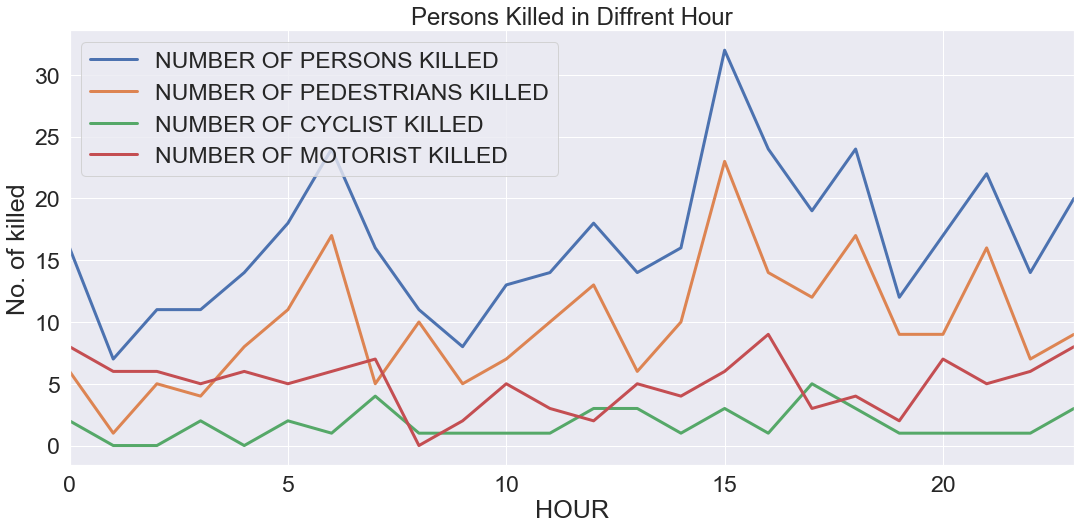

In [94]:
# Numbers of persons killed by hour 

mydf.groupby('HOUR')['NUMBER OF PERSONS KILLED'].sum().plot(figsize=(18,8),legend = True, linewidth = 3)

mydf.groupby('HOUR')['NUMBER OF PEDESTRIANS KILLED'].sum().plot(figsize=(18,8),legend = True, linewidth = 3)
mydf.groupby('HOUR')['NUMBER OF CYCLIST KILLED'].sum().plot(figsize=(18,8),legend = True, linewidth = 3)
mydf.groupby('HOUR')['NUMBER OF MOTORIST KILLED'].sum().plot(figsize=(18,8),legend = True, linewidth = 3)

plt.title('Persons Killed in Diffrent Hour', size = 24)
plt.ylabel('No. of killed')

Text(0, 0.5, 'No. of Injured')

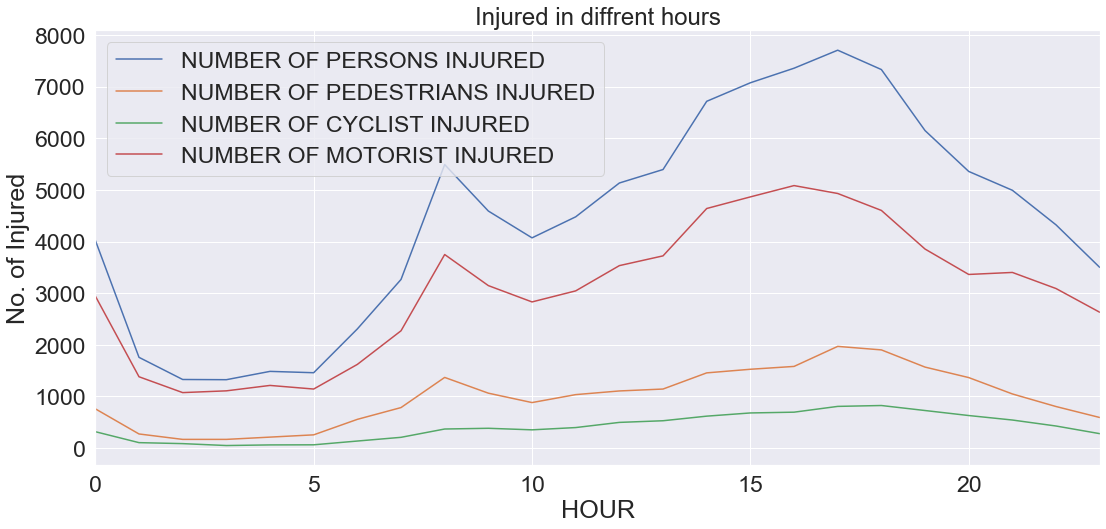

In [104]:
# change in fig with injured in  ax1 and killed in ax2 


mydf.groupby('HOUR')['NUMBER OF PERSONS INJURED'].sum().plot(figsize=(18,8),legend = True)
mydf.groupby('HOUR')['NUMBER OF PEDESTRIANS INJURED'].sum().plot(figsize=(18,8),legend = True)
mydf.groupby('HOUR')['NUMBER OF CYCLIST INJURED'].sum().plot(figsize=(18,8),legend = True)
mydf.groupby('HOUR')['NUMBER OF MOTORIST INJURED'].sum().plot(figsize=(18,8),legend = True)
# dfall.groupby('HOUR').sum().plot(figsize=(20,12),legend = True, linewidth = 3)

#mydf.groupby('HOUR')['HOUR'].sum().plot(figsize=(24,12),legend = True, label = 'total crashes per hour')


plt.title('Injured in diffrent hours', size = 24)
plt.ylabel('No. of Injured')



Text(0, 0.5, 'No. of accidents')

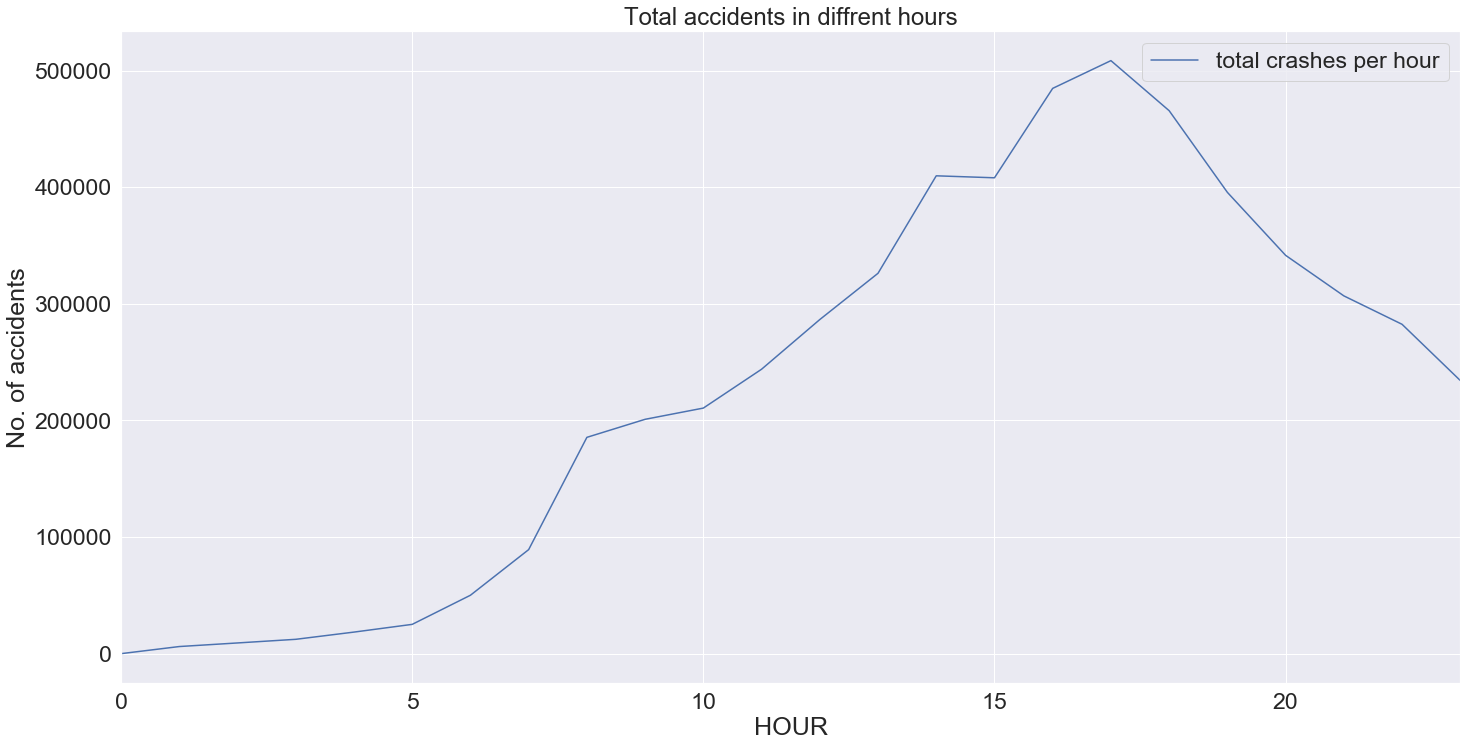

In [107]:
mydf.groupby('HOUR')['HOUR'].sum().plot(figsize=(24,12),legend = True, label = 'total crashes per hour')
plt.title('Total accidents in diffrent hours', size = 24)
plt.ylabel('No. of accidents')

# Monthly crash record of last 36 month 

In [60]:
mydf.shape

(415758, 25)

In [37]:
mydf.groupby('YEAR-MONTH').sum()

,COLLISION_ID,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,HOUR,MONTH
YEAR-MONTH,,,,,,,,,,,,,,
2017-01,38914456937,117187279,439664.624042,-798125.563770,2650.0,11.0,799,10,145,0,1706,1,141512.0,10797
2017-02,35935065998,107688019,404256.229292,-733801.664076,2337.0,6.0,605,4,153,0,1580,2,129975.0,19854
2017-03,43714055292,130402842,489487.552291,-888518.243999,2659.0,9.0,736,6,159,1,1769,2,158197.0,36060
2017-04,40017729233,118490944,445888.902898,-809377.946632,2561.0,13.0,539,4,235,2,1786,7,145181.0,43796
2017-05,47103494179,139037623,522064.399707,-947660.717296,3264.0,6.0,700,4,337,1,2228,1,169968.0,64100
2017-06,48408556523,142050238,533455.573788,-968371.858814,3372.0,12.0,607,4,408,3,2357,5,175534.0,78600
2017-07,44473248926,129994341,487436.393465,-884810.031732,3136.0,14.0,516,8,421,2,2199,5,161350.0,83790
2017-08,40755247972,118390047,444357.850328,-806612.922486,2798.0,13.0,502,6,336,2,1963,5,145707.0,87296
2017-09,40428939021,116720687,438579.352079,-796129.951837,2797.0,12.0,610,5,357,4,1826,3,142207.0,96930


Text(0, 0.5, 'No. of killed')

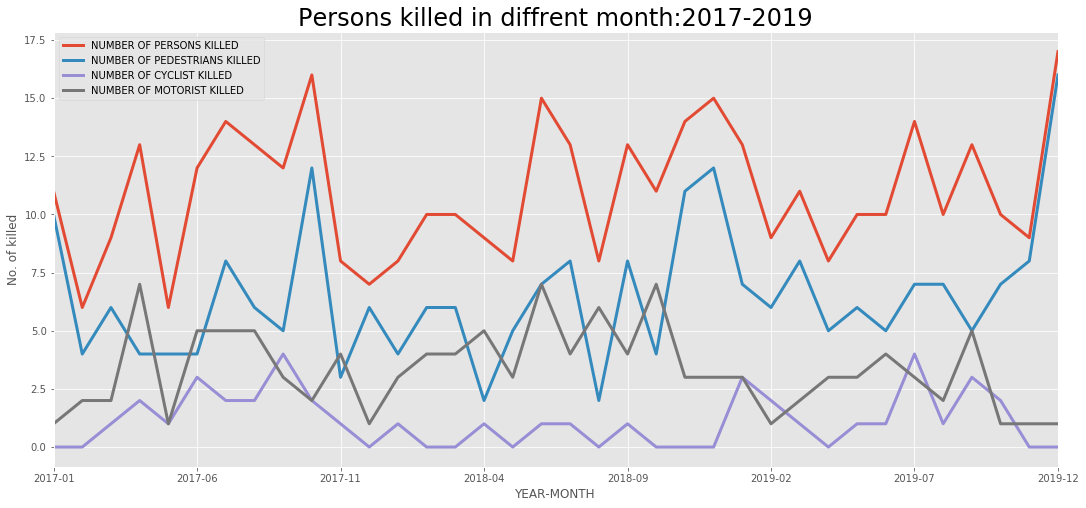

In [38]:
# by month killed

mydf.groupby('YEAR-MONTH')['NUMBER OF PERSONS KILLED'].sum().plot(figsize=(18,8),legend = True, linewidth = 3)
mydf.groupby('YEAR-MONTH')['NUMBER OF PEDESTRIANS KILLED'].sum().plot(figsize=(18,8),legend = True, linewidth = 3)
mydf.groupby('YEAR-MONTH')['NUMBER OF CYCLIST KILLED'].sum().plot(figsize=(18,8),legend = True, linewidth = 3)
mydf.groupby('YEAR-MONTH')['NUMBER OF MOTORIST KILLED'].sum().plot(figsize=(18,8),legend = True, linewidth = 3)
plt.title('Persons killed in diffrent month:2017-2019', size = 24)

plt.ylabel('No. of killed')

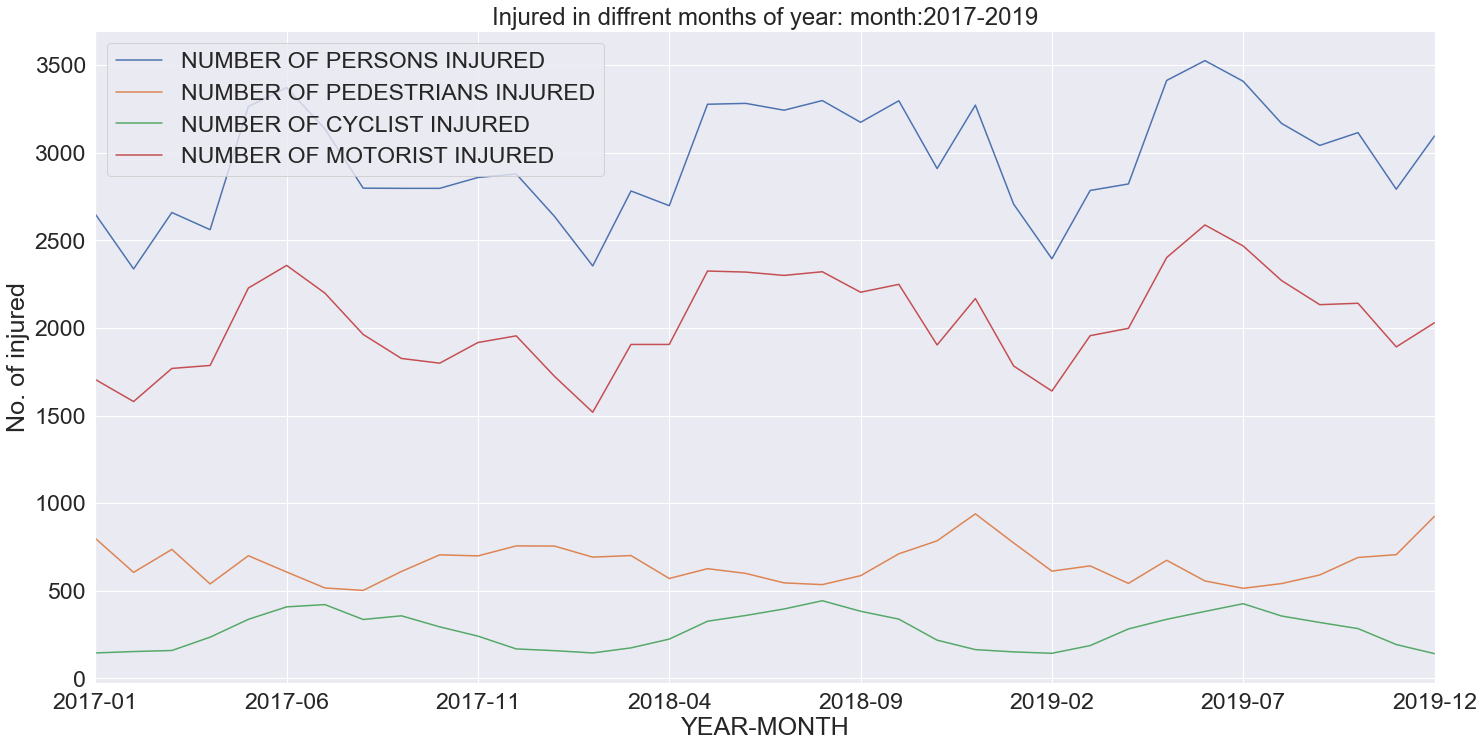

In [102]:
# change in fig with injured in  ax1 and killed in ax2 


mydf.groupby('YEAR-MONTH')['NUMBER OF PERSONS INJURED'].sum().plot(figsize=(24,12),legend = True)
mydf.groupby('YEAR-MONTH')['NUMBER OF PEDESTRIANS INJURED'].sum().plot(figsize=(24,12),legend = True)
mydf.groupby('YEAR-MONTH')['NUMBER OF CYCLIST INJURED'].sum().plot(figsize=(24,12),legend = True)
mydf.groupby('YEAR-MONTH')['NUMBER OF MOTORIST INJURED'].sum().plot(figsize=(24,12),legend = True)

plt.title('Injured in diffrent months of year: month:2017-2019', size = 24)
plt.ylabel('No. of injured')
plt.show()



# What were top reasons for crash ?

In [90]:
# find percentage of known contributing factors 


def percentage_from_dfseries(series):
    '''
    Finds percentage of particular event from a column of given dataframe
    
    arguemet: 
    --------
    series: (pandas.Series) column from column of dataframe 
    '''
    total_known = series.sum()
    perc_total = []
    for i in perc['series']: 
        percent = round(((i/total_known)*100), 2) # rounded to two decimal 
        perc_total.append(percent)
    return perc_total

# percents = [32.25, 10.25, 8.41, 7.73, 6.32, 5.86, 3.96, 3.45, 3.35, 2.5]
# sum(percent) # 84 

In [40]:
# Reason of vehicle1: Top reasons of accident happened in descending order 

mydf.groupby('CONTRIBUTING FACTOR VEHICLE 1').count().sort_values(by = 'CRASH TIME', ascending = False).head(10)


,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,HOUR,MONTH,YEAR-MONTH
CONTRIBUTING FACTOR VEHICLE 1,,,,,,,,,,,,,,,,,,,,,
Unspecified,103754,103754,103754,103754,103754,103754,103754,103754,60603,60559,...,103754,103754,103754,103754,63402,103386,57437,103754,103754,103754
Driver Inattention/Distraction,100608,100608,100608,100608,100608,100608,100608,100608,65407,65353,...,100608,100608,100608,100608,92254,100105,81589,100608,100608,100608
Failure to Yield Right-of-Way,31981,31981,31981,31981,31981,31981,31981,31981,26331,26325,...,31981,31981,31981,31981,26126,31562,24916,31981,31981,31981
Following Too Closely,26245,26245,26245,26245,26245,26245,26245,26245,20163,20128,...,26245,26245,26245,26245,26062,26240,23838,26245,26245,26245
Backing Unsafely,24112,24112,24112,24112,24112,24112,24112,24112,9735,9735,...,24112,24112,24112,24112,22131,23958,19547,24112,24112,24112
Passing Too Closely,19730,19730,19730,19730,19730,19730,19730,19730,10287,10287,...,19730,19730,19730,19730,19291,19678,14084,19730,19730,19730
Passing or Lane Usage Improper,18289,18289,18289,18289,18289,18289,18289,18289,12562,12558,...,18289,18289,18289,18289,18008,18277,14748,18289,18289,18289
Other Vehicular,12341,12341,12341,12341,12341,12341,12341,12341,7310,7304,...,12341,12341,12341,12341,10691,12319,9297,12341,12341,12341
Turning Improperly,10777,10777,10777,10777,10777,10777,10777,10777,8335,8334,...,10777,10777,10777,10777,10398,10750,9296,10777,10777,10777


# Top 10 contributing factors make up 84% of all accidents from known factors.<br>
Percentage from contributing factors above [32.25, 10.25, 8.41, 7.73, 6.32, 5.86, 3.96, 3.45, 3.35, 2.5]

In [86]:
# Reason of vehicle2: Top reasons of accident happened in descending order 

mydf.groupby('CONTRIBUTING FACTOR VEHICLE 2').count().sort_values(by = 'CRASH TIME', ascending = False).head(10)


,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,HOUR,MONTH,YEAR-MONTH
CONTRIBUTING FACTOR VEHICLE 2,,,,,,,,,,,,,,,,,,,,,
Unspecified,288527,288527,288527,288527,288527,288527,288527,288527,187069,186930,...,288527,288527,288527,288527,288527,288489,251078,288527,288527,288527
Driver Inattention/Distraction,23128,23128,23128,23128,23128,23128,23128,23128,16699,16690,...,23128,23128,23128,23128,23128,23126,21931,23128,23128,23128
Other Vehicular,5376,5376,5376,5376,5376,5376,5376,5376,3556,3554,...,5376,5376,5376,5376,5376,5376,4997,5376,5376,5376
Passing or Lane Usage Improper,4233,4233,4233,4233,4233,4233,4233,4233,2998,2997,...,4233,4233,4233,4233,4233,4232,3890,4233,4233,4233
Following Too Closely,4137,4137,4137,4137,4137,4137,4137,4137,2954,2953,...,4137,4137,4137,4137,4137,4135,3930,4137,4137,4137
Failure to Yield Right-of-Way,3813,3813,3813,3813,3813,3813,3813,3813,3020,3016,...,3813,3813,3813,3813,3813,3813,3679,3813,3813,3813
Passing Too Closely,3388,3388,3388,3388,3388,3388,3388,3388,2169,2169,...,3388,3388,3388,3388,3388,3388,3044,3388,3388,3388
Backing Unsafely,2076,2076,2076,2076,2076,2076,2076,2076,887,887,...,2076,2076,2076,2076,2076,2076,1952,2076,2076,2076
Unsafe Lane Changing,1883,1883,1883,1883,1883,1883,1883,1883,1428,1427,...,1883,1883,1883,1883,1883,1882,1763,1883,1883,1883


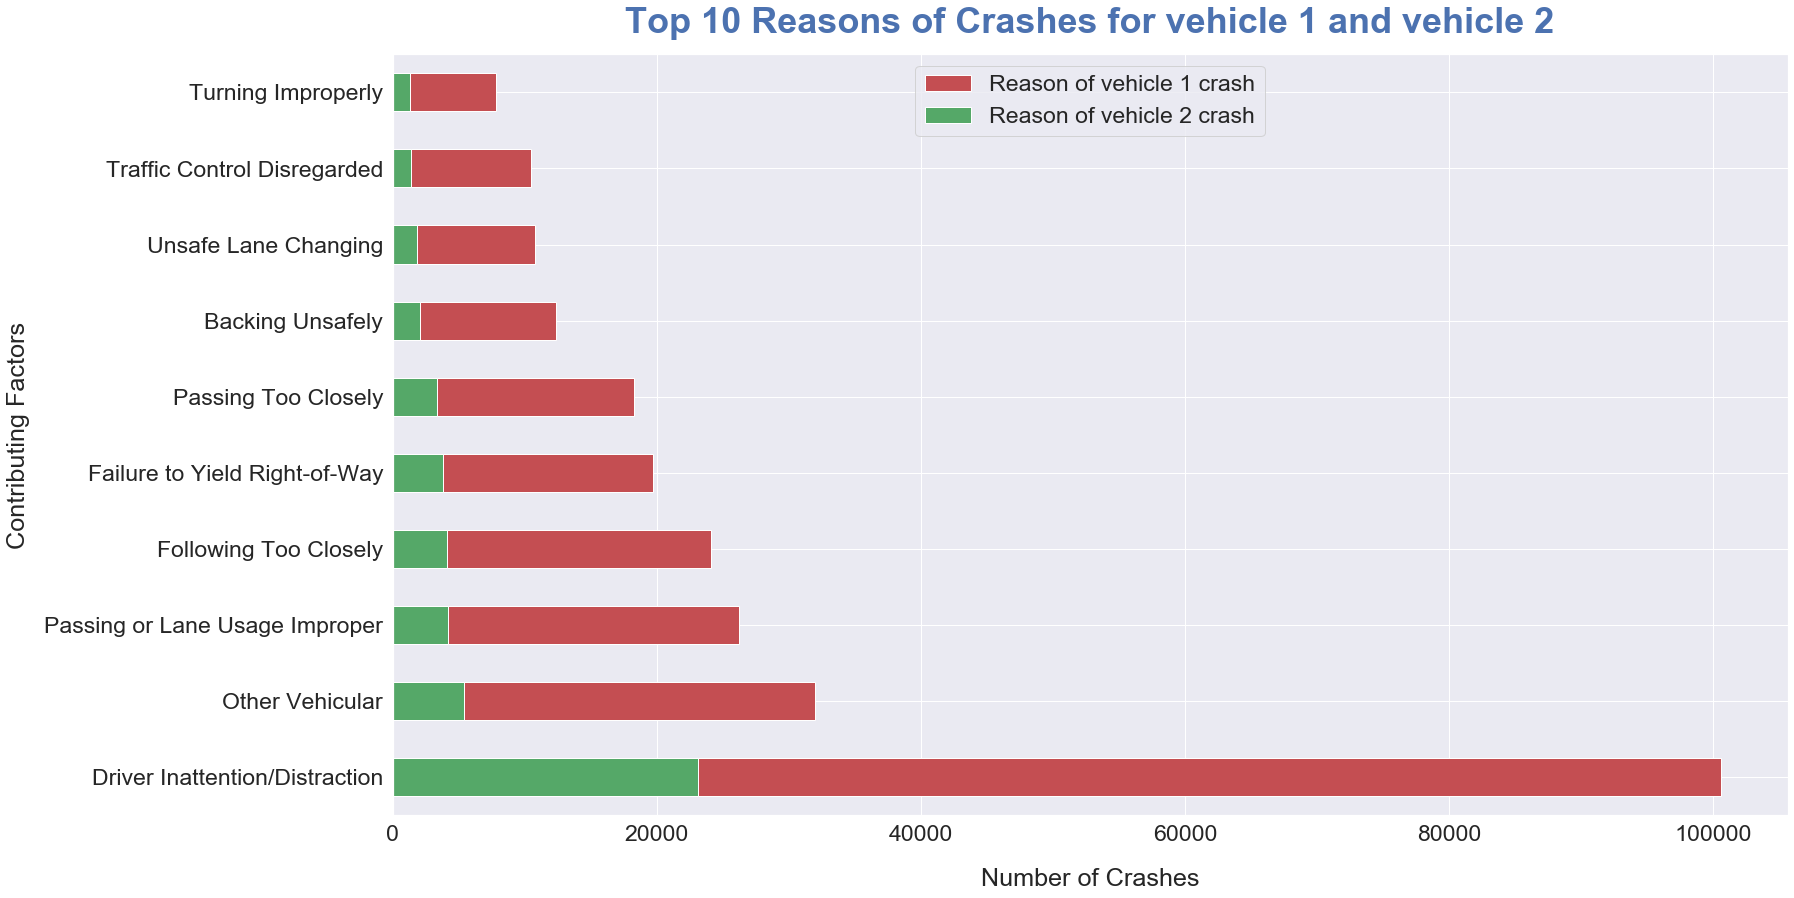

In [83]:
# Bar plot of Reasons of accident 

import seaborn as sns
sns.set(font_scale= 2.1)
ax = plt.subplot(111)

mydf['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:11].plot(kind = 'barh', figsize = (25, 14),color = 'r', rot = 0, label = 'Reason of vehicle 1 crash' )
mydf['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()[1:11].plot(kind = 'barh', figsize = (25, 14), color = 'g', rot = 0, label = 'Reason of vehicle 2 crash')

plt.xlabel("Number of Crashes", labelpad=23)
plt.ylabel("Contributing Factors", labelpad=14,)
plt.title("Top 10 Reasons of Crashes for vehicle 1 and vehicle 2", c = 'b', weight = 999, y=1.02,  size = 36);
plt.legend(loc = 'upper center')

# Top Streets for vehicle crashes 

In [159]:
# Reason of vehicle1: Top reasons of accident happened in descending order 

#crash.groupby('REASONS_V1').count().sort_values(by = 'CRASH TIME', ascending = False).head(20)
mydf.groupby('ON STREET NAME').count().sort_values(by = 'CRASH TIME', ascending = False).head(10)


,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CROSS STREET NAME,NUMBER OF PERSONS INJURED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,HOUR,MONTH,YEAR-MONTH
ON STREET NAME,,,,,,,,,,,,,,,,,,,,,
ATLANTIC AVENUE,3171,3171,3171,3171,3171,3171,3171,3171,3171,3171,...,3171,3171,3171,3164,2849,3157,2635,3171,3171,3171
3 AVENUE,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,...,3161,3161,3161,3158,2776,3145,2541,3161,3161,3161
BROADWAY,3142,3142,3142,3142,3142,3142,3142,3142,3142,3141,...,3142,3142,3142,3129,2689,3122,2460,3142,3142,3142
NORTHERN BOULEVARD,2351,2351,2351,2351,2351,2351,2351,2351,2351,2350,...,2351,2351,2351,2345,2102,2342,1992,2351,2351,2351
2 AVENUE,2332,2332,2332,2332,2332,2332,2332,2332,2332,2332,...,2332,2332,2332,2328,2091,2323,1934,2332,2332,2332
LINDEN BOULEVARD,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,...,2314,2314,2314,2300,2025,2297,1893,2314,2314,2314
QUEENS BOULEVARD,1918,1918,1918,1918,1918,1918,1918,1918,1918,1918,...,1918,1918,1918,1914,1706,1909,1589,1918,1918,1918
FLATBUSH AVENUE,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,...,1794,1794,1794,1786,1579,1773,1452,1794,1794,1794
BRUCKNER BOULEVARD,1685,1685,1685,1685,1685,1685,1685,1685,1685,1685,...,1685,1685,1685,1682,1505,1678,1365,1685,1685,1685


# Most common vehicle types involved in accidents

In [45]:
# Types of vehicle 1 involved in accidnet in descending order 

mydf.groupby('VEHICLE TYPE CODE 1').count().sort_values(by = 'CRASH TIME', ascending = False).head(10)


,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 2,HOUR,MONTH,YEAR-MONTH
VEHICLE TYPE CODE 1,,,,,,,,,,,,,,,,,,,,,
Sedan,105043,105043,105043,105043,105043,105043,105043,105043,67446,67405,...,105043,105043,105043,105043,104917,86814,79700,105043,105043,105043
PASSENGER VEHICLE,93590,93590,93590,93590,93590,93590,93590,93590,61550,61515,...,93590,93590,93590,93590,93542,79051,66080,93590,93590,93590
Station Wagon/Sport Utility Vehicle,83908,83908,83908,83908,83908,83908,83908,83908,53124,53088,...,83908,83908,83908,83908,83851,70115,64770,83908,83908,83908
SPORT UTILITY / STATION WAGON,64272,64272,64272,64272,64272,64272,64272,64272,40523,40486,...,64272,64272,64272,64272,64248,54743,46421,64272,64272,64272
Taxi,10802,10802,10802,10802,10802,10802,10802,10802,7470,7466,...,10802,10802,10802,10802,10791,9314,8923,10802,10802,10802
TAXI,9606,9606,9606,9606,9606,9606,9606,9606,6499,6497,...,9606,9606,9606,9606,9603,8477,7370,9606,9606,9606
Pick-up Truck,6946,6946,6946,6946,6946,6946,6946,6946,4312,4306,...,6946,6946,6946,6946,6941,5998,5726,6946,6946,6946
Box Truck,5517,5517,5517,5517,5517,5517,5517,5517,3089,3089,...,5517,5517,5517,5517,5513,4793,4669,5517,5517,5517
PICK-UP TRUCK,5424,5424,5424,5424,5424,5424,5424,5424,3422,3419,...,5424,5424,5424,5424,5420,4731,4157,5424,5424,5424


In [46]:
# Types of vehicle 2 involved in accidnet in descending order 

mydf.groupby('VEHICLE TYPE CODE 2').count().sort_values(by = 'CRASH TIME', ascending = False).head(10)


,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,HOUR,MONTH,YEAR-MONTH
VEHICLE TYPE CODE 2,,,,,,,,,,,,,,,,,,,,,
Sedan,75150,75150,75150,75150,75150,75150,75150,75150,51230,51191,...,75150,75150,75150,75150,75149,74554,75150,75150,75150,75150
Station Wagon/Sport Utility Vehicle,62852,62852,62852,62852,62852,62852,62852,62852,41560,41525,...,62852,62852,62852,62852,62851,62435,62852,62852,62852,62852
PASSENGER VEHICLE,62781,62781,62781,62781,62781,62781,62781,62781,43744,43714,...,62781,62781,62781,62781,62780,62070,62781,62781,62781,62781
SPORT UTILITY / STATION WAGON,45019,45019,45019,45019,45019,45019,45019,45019,29625,29594,...,45019,45019,45019,45019,45018,44604,45019,45019,45019,45019
Taxi,8525,8525,8525,8525,8525,8525,8525,8525,5916,5916,...,8525,8525,8525,8525,8525,8488,8525,8525,8525,8525
TAXI,7188,7188,7188,7188,7188,7188,7188,7188,4906,4902,...,7188,7188,7188,7188,7187,7129,7188,7188,7188,7188
Pick-up Truck,6348,6348,6348,6348,6348,6348,6348,6348,4043,4039,...,6348,6348,6348,6348,6348,6285,6348,6348,6348,6348
Box Truck,5800,5800,5800,5800,5800,5800,5800,5800,3462,3462,...,5800,5800,5800,5800,5800,5745,5800,5800,5800,5800
Bike,5113,5113,5113,5113,5113,5113,5113,5113,3657,3657,...,5113,5113,5113,5113,5113,5070,5113,5113,5113,5113


# Vehicle Crashes by Hour 

In [156]:
# Order by number of accident happened in each hour descending order 
#crash.HOUR = crash.HOUR.astype(float)
mydf.groupby('HOUR').count().sort_values(by = 'CRASH TIME', ascending = False)


,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,MONTH,YEAR-MONTH
HOUR,,,,,,,,,,,,,,,,,,,,,
16.0,30302,30302,30302,30302,30302,30302,30302,30302,19709,19697,...,30302,30302,30302,30302,30196,26032,30116,23407,30302,30302
17.0,29919,29919,29919,29919,29919,29919,29919,29919,19884,19874,...,29919,29919,29919,29919,29795,25188,29697,22788,29919,29919
14.0,29274,29274,29274,29274,29274,29274,29274,29274,18502,18487,...,29274,29274,29274,29274,29179,25034,29083,22243,29274,29274
15.0,27209,27209,27209,27209,27209,27209,27209,27209,17582,17573,...,27209,27209,27209,27209,27118,23046,27022,20634,27209,27209
18.0,25872,25872,25872,25872,25872,25872,25872,25872,17353,17342,...,25872,25872,25872,25872,25772,21523,25670,19454,25872,25872
13.0,25095,25095,25095,25095,25095,25095,25095,25095,15477,15464,...,25095,25095,25095,25095,25044,21431,24963,19067,25095,25095
12.0,23879,23879,23879,23879,23879,23879,23879,23879,14377,14371,...,23879,23879,23879,23879,23822,20311,23758,17977,23879,23879
8.0,23190,23190,23190,23190,23190,23190,23190,23190,15373,15362,...,23190,23190,23190,23190,23108,19258,23040,16853,23190,23190
9.0,22332,22332,22332,22332,22332,22332,22332,22332,14203,14192,...,22332,22332,22332,22332,22279,18718,22222,16271,22332,22332


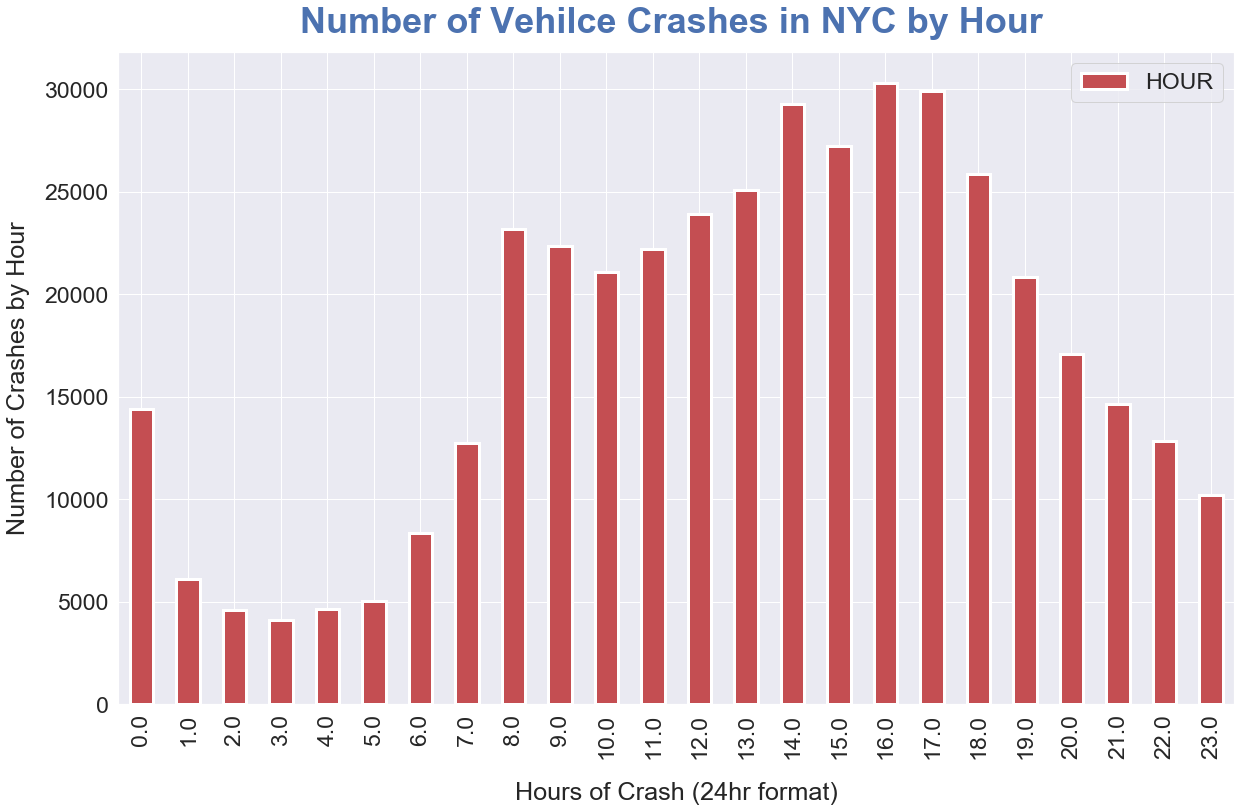

In [158]:
# Bar plot of accidents by hour 

import seaborn as sns
sns.set(font_scale= 2.1)

mydf.groupby('HOUR')['HOUR'].count().plot(kind = 'bar',figsize=(20,12),legend = True,color = 'r', linewidth = 3)

plt.xlabel("Hours of Crash (24hr format)", labelpad=23)
plt.ylabel("Number of Crashes by Hour", labelpad=14,)
plt.title("Number of Vehilce Crashes in NYC by Hour ", c = 'b', weight = 999, y=1.02,  size = 36);
plt.show()

# Vehicle Crashes by Month 
Which months had more and which had less accident compared to others

In [133]:
# # Bar plot of accidents by month 

# import seaborn as sns
# sns.set(font_scale= 1.1)
# dfall.groupby('MONTH')['MONTH'].sum().plot(figsize=(20,12),legend = True, linewidth = 3)
# #(kind = 'bar', color = 'r', figsize = (12, 8), rot = 0)
# #dfall.groupby('HOUR')['HOUR'].sum().plot(figsize=(20,12),legend = True, linewidth = 3)

# plt.xlabel("Number of Crashes", labelpad=13)
# plt.ylabel("Months of Crash", labelpad=14,)
# plt.title("Number of Vehilce Crashes in NYC by Months ", c = 'b', weight = 99, y=1.02,  size = 16)
# plt.legend();
